In [1]:
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


data in each class

id        7613 (non-null)

keyword   7552

location  5080

text      7613 (non-null)

target    7613 (non-null)

In [5]:
df.isnull().sum()


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

there is missing data is keyword by 61 null (0.8%)

and in location 2533 missing or null value (33.27%)

In [6]:
#the top 15 keyword of the data
x = df["keyword"].value_counts()
x.head(15)

fatalities     45
deluge         42
armageddon     42
damage         41
body%20bags    41
sinking        41
harm           41
evacuate       40
twister        40
collided       40
siren          40
windstorm      40
fear           40
outbreak       40
hellfire       39
Name: keyword, dtype: int64

In [7]:
#the top 15 locations of the data
y = df["location"].value_counts()
y.head(15)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

In [8]:
#the target of the data
w = df["target"].value_counts()
w.head()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
file_text = df.drop(['id','keyword','location','target'],axis=1)
file_text

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...


In [10]:
file_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
dtypes: object(1)
memory usage: 59.6+ KB


In [11]:
num_columns = file_text.sum(axis=1).astype(str)

In [12]:
one_cell = num_columns.values.sum(axis=0)
#one_cell

# Clean the data

In [13]:
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

In [14]:
def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)

In [15]:
def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [16]:
df["text"] = df.text.map(lambda x: remove_URL(x))
df["text"] = df.text.map(lambda x: remove_html(x))
df["text"] = df.text.map(lambda x: remove_punct(x))


# remove stop words

In [17]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
def remove_stopwords(text):
    temp_list=[]
    for word in text.split():
        if word.lower() not in stopwords:
            temp_list.append(word.lower())
    return " ".join(temp_list)

In [18]:
df["text"] = df["text"].map(remove_stopwords)

In [19]:
print(df.text)

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       13000 people receive wildfires evacuation orde...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                      m194 0104 utc5km volcano hawaii
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object


In [20]:
from collections import Counter

def counter(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word] +=1
    return count

In [21]:
#print the most common words
text = df.text
count_words = counter(text)
print(count_words. most_common(10))

[('like', 345), ('im', 299), ('amp', 298), ('fire', 250), ('get', 229), ('new', 224), ('via', 220), ('people', 196), ('one', 193), ('news', 193)]


like, fire, get, via, people, new, one and news are the most common word

In [22]:
#print the most common stop words
text = num_columns
count_stop_words = counter(text)
print(count_stop_words.most_common(10))

[('the', 2575), ('a', 1845), ('to', 1805), ('in', 1757), ('of', 1722), ('and', 1302), ('I', 1197), ('for', 820), ('is', 814), ('on', 773)]


In [23]:
#max_length = 26 old # 255 guaranteed 

num_words = len(count_words)
num_words

17971

In [24]:
#max_length = max(len(x) for x in df.text)
max_length =20

# Install NLTK

In [25]:
#import nltk
#nltk.download()

In [26]:
#pip install nltk

In [27]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk 
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

Tensorflow Version 2.8.0


# df Test Call

In [28]:
df_test = pd.read_csv("test.csv")

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


# Train - Validation split

In [30]:
train_size = int(df.shape[0] * 0.7)

train_text = df.text[:train_size]
train_target = df.target[:train_size]

test_text = df.text[train_size:]
test_target = df.target[train_size:]

In [31]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_text)

In [32]:
word_index = tokenizer.word_index
#word_index

In [33]:
train_text = tokenizer.texts_to_sequences(train_text)

In [36]:
from keras.preprocessing.sequence import pad_sequences
train_padded = pad_sequences(
    train_text, maxlen=max_length, padding="post", truncating="post"
)

In [37]:
test_text = tokenizer.texts_to_sequences(test_text)
test_padded = pad_sequences(
    test_text, maxlen=max_length, padding="post", truncating="post"
)

In [38]:
print(f"Shape of train {train_padded.shape}")
print(f"Shape of test {test_padded.shape}")

Shape of train (5329, 20)
Shape of test (2284, 20)


In [39]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Embedding(num_words, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.1))



model.add(Dense(1,activation='sigmoid'))


optimizer = Adam(learning_rate=3e-4)
model.compile(loss="binary_crossentropy", 
              optimizer=optimizer, 
              metrics=["accuracy"]
             )


In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 32)            575072    
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 599,969
Trainable params: 599,969
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(
    train_padded, train_target, epochs=5, validation_data=(test_padded, test_target),
)

Epoch 1/5
167/167 [==============================] - 7s 26ms/step - loss: 0.6610 - accuracy: 0.5960 - val_loss: 0.5820 - val_accuracy: 0.7316
Epoch 2/5
167/167 [==============================] - 4s 23ms/step - loss: 0.3956 - accuracy: 0.8307 - val_loss: 0.5241 - val_accuracy: 0.7553
Epoch 3/5
167/167 [==============================] - 4s 23ms/step - loss: 0.2411 - accuracy: 0.9077 - val_loss: 0.5651 - val_accuracy: 0.7404
Epoch 4/5
167/167 [==============================] - 4s 23ms/step - loss: 0.1532 - accuracy: 0.9469 - val_loss: 0.6904 - val_accuracy: 0.7246
Epoch 5/5
167/167 [==============================] - 4s 22ms/step - loss: 0.1033 - accuracy: 0.9662 - val_loss: 0.8605 - val_accuracy: 0.7211


In [42]:
loss,accuracy=model.evaluate(train_padded,train_target)

167/167 [==============================] - 1s 5ms/step - loss: 0.0619 - accuracy: 0.9825


In [43]:
import warnings
warnings.filterwarnings('ignore')

# Making the Predictions:

In [ ]:
df_test["text"] = df_test.text.map(lambda x: remove_URL(x))
df_test["text"] = df_test.text.map(lambda x: remove_html(x))
df_test["text"] = df_test.text.map(lambda x: remove_punct(x))

In [ ]:
df_test_sequences = tokenizer.texts_to_sequences(df_test["text"])
df_test_padded = pad_sequences(
    df_test_sequences, maxlen=max_length, padding="post", truncating="post"
)

In [ ]:
print(f"Shape of test {df_test_padded.shape}")

In [44]:
x = df_test['text']

In [45]:
test_prediction = model.predict(x)

UnimplementedError: Graph execution error:

Detected at node 'sequential/Cast' defined at (most recent call last):
    File "C:\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\anaconda3\lib\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\anaconda3\lib\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\anaconda3\lib\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\anaconda3\lib\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\anaconda3\lib\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "C:\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-45-3181e078c014>", line 1, in <module>
      test_prediction = model.predict(x)
    File "C:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "C:\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "C:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\anaconda3\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\anaconda3\lib\site-packages\keras\engine\functional.py", line 571, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "C:\anaconda3\lib\site-packages\keras\engine\functional.py", line 671, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'sequential/Cast'
Cast string to float is not supported
	 [[{{node sequential/Cast}}]] [Op:__inference_predict_function_9910]

In [ ]:
sample = pd.read_csv(files['sample'])
sample

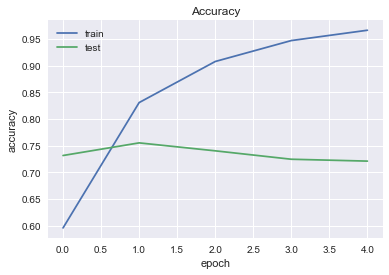

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

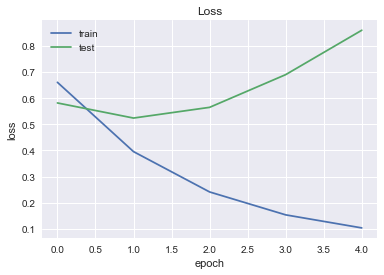

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [48]:
model.save('mymodel')

INFO:tensorflow:Assets written to: mymodel\assets


INFO:tensorflow:Assets written to: mymodel\assets
